Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 7.6 MB/s 
              ad_id  company campaign ID  facebook campaign ID    interest  \
count  1.500000e+02           150.000000            150.000000  150.000000   
mean   8.880689e+05          1010.000000         122852.700000   25.580000   
std    1.934109e+05           119.473116          19826.604326   19.328759   
min    7.087460e+05           916.000000         103916.000000    2.000000   
25%    7.106242e+05           916.000000         104229.250000   16.000000   
50%    7.780805e+05           936.000000         115791.000000   20.000000   
75%    1.121306e+06          1178.000000         144574.250000   29.000000   
max    1.314377e+06          1178.000000         179944.000000  109.000000   

        impressions      clicks       spent  total conversions  \
count  1.500000e+02  150.000000  150.000000         150.000000   
mean   1

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


AD_Conversions:
MINIMIZE
79*ID_1178 + 2*ID_916 + 4*ID_936 + 0
SUBJECT TO
_C1: 302814.9 ID_1178 + 9242.6 ID_916 + 12959.92 ID_936 >= 150000

_C2: 49.64 ID_1178 + 2.18 ID_916 + 3.14 ID_936 >= 50

_C3: 4.14 ID_1178 + 1.08 ID_916 + 1.16 ID_936 >= 30

VARIABLES
0 <= ID_1178 Integer
0 <= ID_916 Integer
0 <= ID_936 Integer

{0: 'Not Solved', 1: 'Optimal', -1: 'Infeasible', -2: 'Unbounded', -3: 'Undefined'}
Not Solved
Optimal
The amount of money to be spent on ID 916 is:  28.0
The amount of money to be spent on ID 936 is:  0.0
The amount of money to be spent on ID 1178 is:  0.0


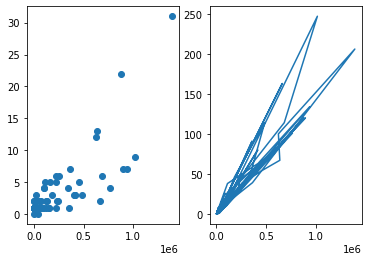

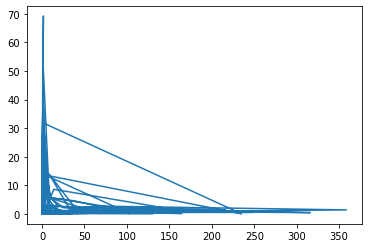

In [1]:

!pip install pulp
import pulp
import matplotlib.pyplot as plt # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pulp import LpProblem,LpMinimize,LpVariable,LpStatus,LpInteger
df=pd.read_csv("sample data.csv")
#print(df)
print(df.describe())
print(["ID 916, ID 936, ID 1178"])
print('([impressions, clicks, total conversions, spent]')

class lpp():
    var=[[],[],[]]
    def valfind(self,id,i,obj):
        obj.var[i].append((df.loc[df['company campaign ID'] == id,'impressions'].mean()))
        obj.var[i].append((df.loc[df['company campaign ID'] == id,'clicks'].mean()))
        obj.var[i].append((df.loc[df['company campaign ID'] == id,'total conversions'].mean()))

lpp.valfind=classmethod(lpp.valfind)

a=df.loc[df['company campaign ID']==916]
#print(a)
b=df.loc[df['company campaign ID']==936]
#print(b)
c=df.loc[df['company campaign ID']==1178]
#print(c)

lppvar=lpp()
lppvar.valfind(916,0,lppvar)
lppvar.valfind(936,1,lppvar)
lppvar.valfind(1178,2,lppvar)
print(lppvar.var)


a_cost=(int(df.loc[df['company campaign ID'] == 916,'spent'].mean()))
b_cost=(int(df.loc[df['company campaign ID'] == 936,'spent'].mean()))
c_cost=(int(df.loc[df['company campaign ID'] == 1178,'spent'].mean()))


const=[]
#print(lppvar.var[0])
#print(lppvar.var[0][1])

def intake():

    temp=0
    check=1 
    temp=int(input("enter the least value of impressions that you wish to obtain: "))
    while(check!=0):
        if temp>=df['impressions'].mean():
            const.append(temp)
            check=0
        else:
            temp=int(input(('value isnt in the range, enter again: ')))
            check=1


    temp=int(input("enter the least value of clicks that you wish to obtain from the viewer: "))
    while(check!=1):
        if temp>=df['clicks'].mean():
            const.append(temp)
            check=1
        else:
            temp=int(input(('value isnt in the range, enter again: ')))
            check=0


    temp=int(input("enter the least value of conversions that you wish to obtain: "))
    while(check!=0):
        if temp>=df['total conversions'].mean():
            const.append(temp)
            check=0
        else:
            temp=int(input(('value isnt in the range, enter again: ')))
            check=1


intake()


def linearproblem():
    problem = LpProblem("AD Conversions", LpMinimize)
    a1 = LpVariable("ID_916", lowBound=0, cat=LpInteger)
    b1 = LpVariable("ID_936", lowBound=0, cat=LpInteger)
    c1 = LpVariable("ID_1178", lowBound=0, cat=LpInteger)

    problem += a1*a_cost + b1*b_cost + c1*c_cost, 'ObjectiveFunction'
    for i in range (0,3):
        problem += (lppvar.var[0][i])*a1 + (lppvar.var[1][i])*b1 + (lppvar.var[2][i])*c1>=(const[i])


    print(problem)
    print(LpStatus)
    print(LpStatus[problem.status])

    problem.solve()
    print(LpStatus[problem.status])

    print("The amount of money to be spent on ID 916 is: ", a1.varValue)
    print("The amount of money to be spent on ID 936 is: ", b1.varValue)
    print("The amount of money to be spent on ID 1178 is: ", c1.varValue)


linearproblem()


plt.subplot(1,2,1)
plt.scatter(df["impressions"], df["total conversions"])
plt.subplot(1,2,2)
plt.plot(df['impressions'], df['clicks'])
plt.show()
plt.plot(df['spent'], df['roas'])
plt.show()